In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from common import *


In [2]:
r = requests.get('https://nvebiapi.nve.no/api/Magasinstatistikk/HentOffentligData')
x = r.json()
df = pd.DataFrame(x)
df = df.sort_values(by='dato_Id', ascending=True, ignore_index=True)
display(df)
df.to_csv(f"{INPUT_DATA}magasin_statistikk_nve.csv")

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
0,1995-01-08,VASS,2,1995,1,0.607655,23.237947,14.120653,0001-01-01T00:00:00,0.707391,-0.099736
1,1995-01-08,EL,4,1995,1,0.557758,20.850529,11.629552,0001-01-01T00:00:00,0.618967,-0.061209
2,1995-01-08,NO,0,1995,1,0.606042,87.203460,52.848970,0001-01-01T00:00:00,0.752527,-0.146485
3,1995-01-08,VASS,1,1995,1,0.631664,35.877495,22.662535,0001-01-01T00:00:00,0.664790,-0.033126
4,1995-01-08,EL,1,1995,1,0.617875,5.975986,3.692410,0001-01-01T00:00:00,0.686428,-0.068553
...,...,...,...,...,...,...,...,...,...,...,...
12622,2021-11-21,EL,3,2021,46,0.800611,9.147280,7.323412,2021-12-01T13:00:00,0.799458,0.001153
12623,2021-11-21,VASS,2,2021,46,0.655445,23.237947,15.231195,2021-12-01T13:00:00,0.646722,0.008723
12624,2021-11-21,EL,4,2021,46,0.818105,20.850529,17.057928,2021-12-01T13:00:00,0.821709,-0.003603
12625,2021-11-21,VASS,1,2021,46,0.674100,35.877495,24.185034,2021-12-01T13:00:00,0.676180,-0.002079


In [3]:
def get_område(df, omrnr, data_from_year=2016):
    omr = df.loc[df['omrnr'] == omrnr]
    omr = omr.loc[omr['iso_aar'] >= data_from_year]
    omr = omr.loc[omr['omrType'] == "EL"]
    return omr

Text(0.5, 0, 'Date')

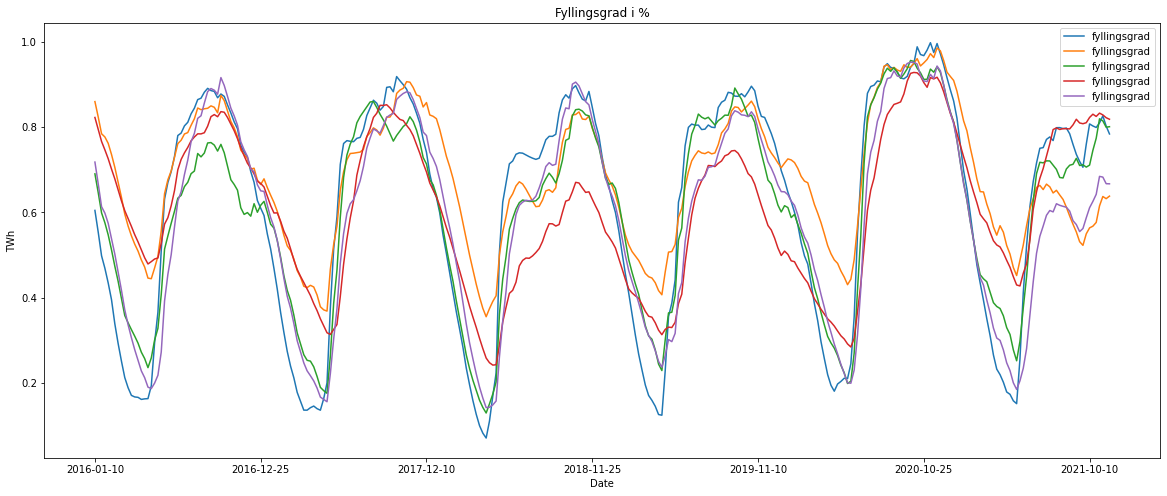

In [4]:
ax = get_område(df, 1).plot("dato_Id", "fyllingsgrad", figsize=(20,8))
get_område(df, 2).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 3).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 4).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
get_område(df, 5).plot("dato_Id", "fyllingsgrad", figsize=(20,8), ax=ax)
plt.title("Fyllingsgrad i %")
plt.ylabel("TWh")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

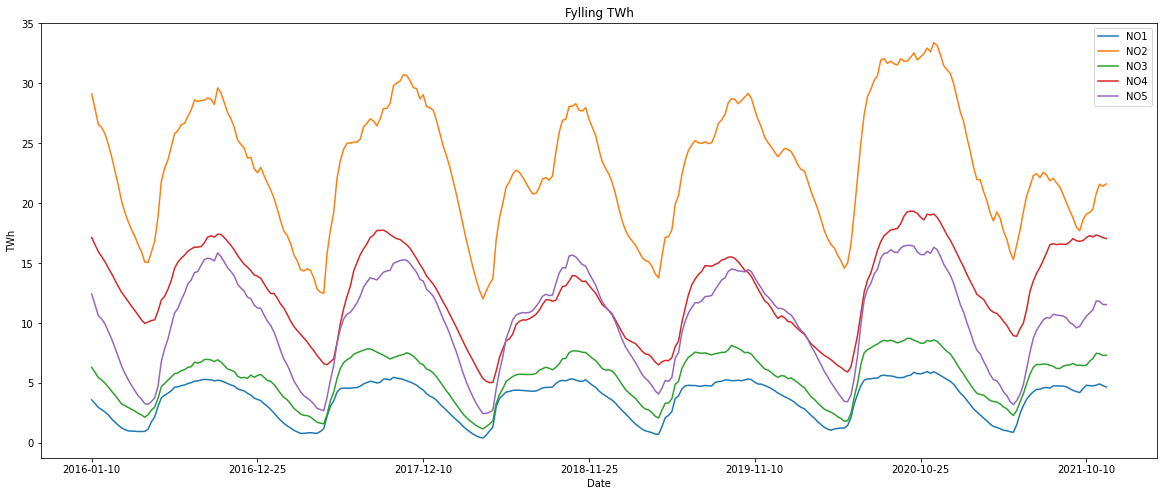

In [5]:
ax = get_område(df, 1).plot("dato_Id", "fylling_TWh", figsize=(20,8), label="NO1")
get_område(df, 2).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO2")
get_område(df, 3).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO3")
get_område(df, 4).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO4")
get_område(df, 5).plot("dato_Id", "fylling_TWh", figsize=(20,8), ax=ax, label="NO5")
plt.title("Fylling TWh")
plt.ylabel("TWh")
plt.xlabel("Date")

<AxesSubplot:xlabel='dato_Id'>

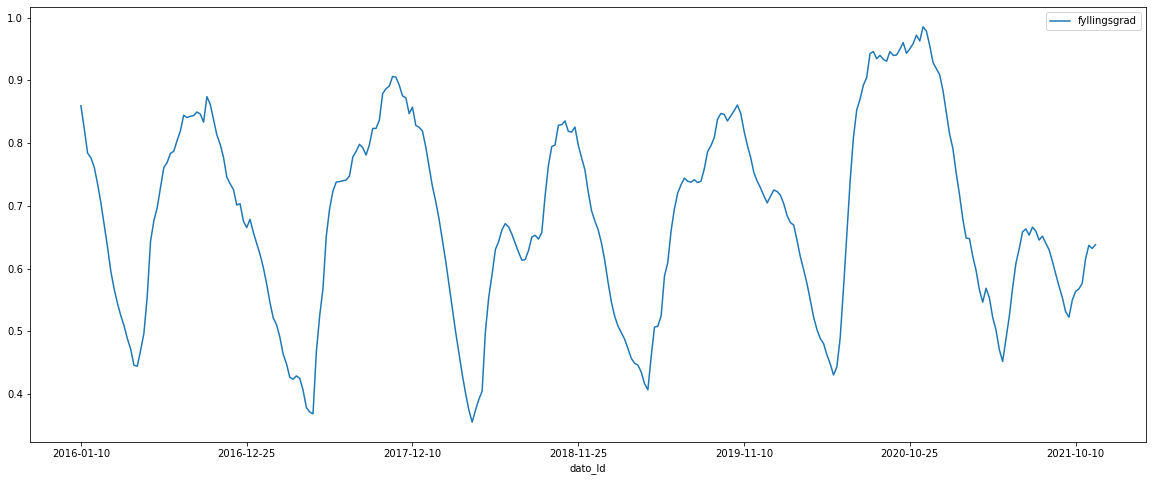

In [6]:
get_område(df, 2).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

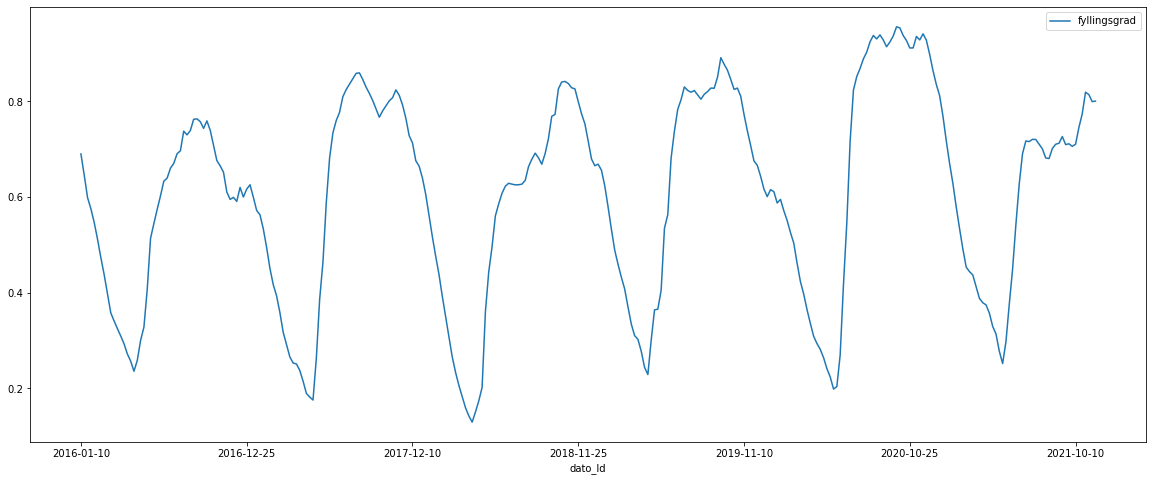

In [7]:
get_område(df, 3).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

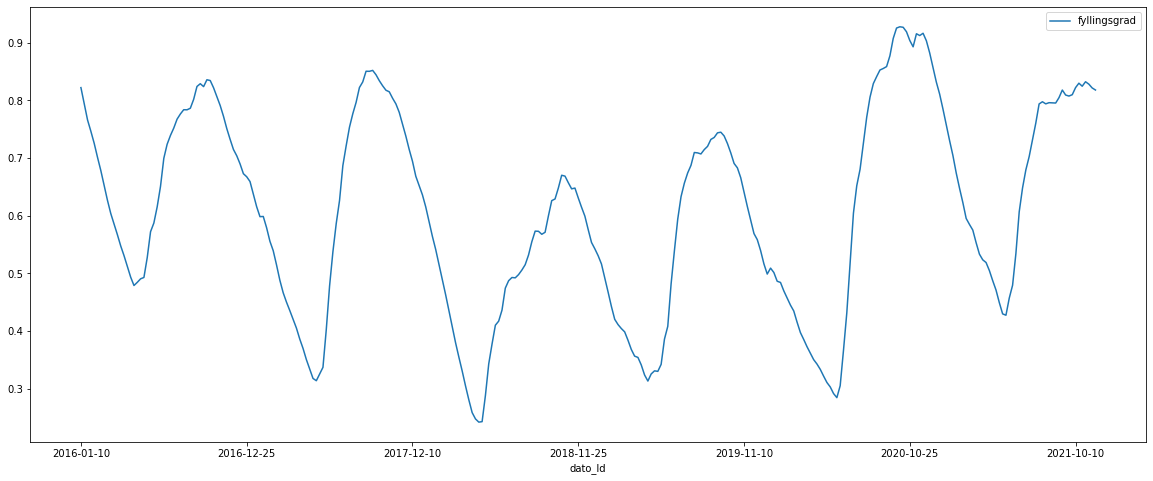

In [8]:
get_område(df, 4).plot("dato_Id", "fyllingsgrad", figsize=(20,8))

<AxesSubplot:xlabel='dato_Id'>

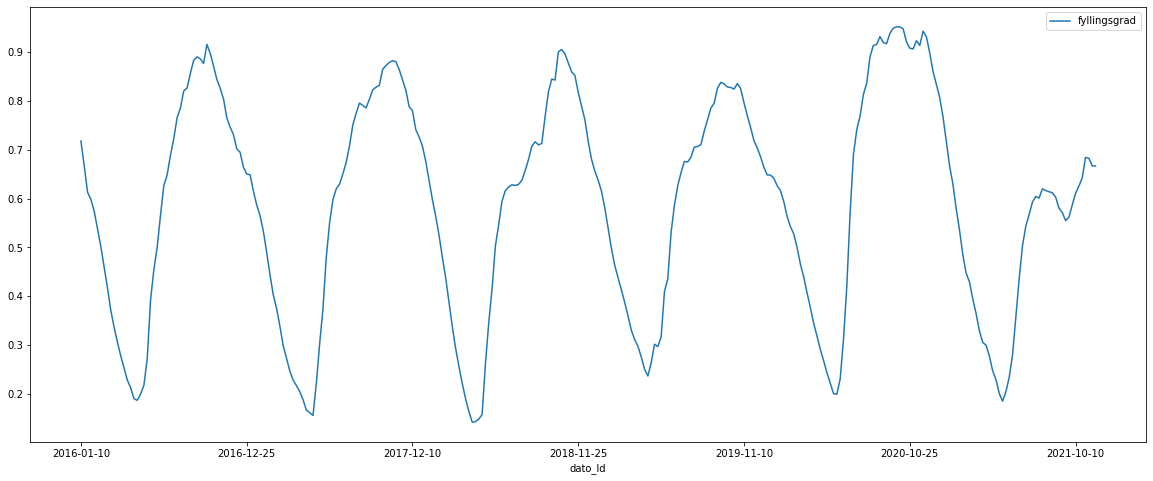

In [9]:
get_område(df, 5).plot("dato_Id", "fyllingsgrad", figsize=(20,8))